In [1]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number



In [2]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas version 1.0.2
Matplotlib version 3.1.0



Create Data
The data set will consist of 5 baby names and the number of births recorded for that year (1880).

In [3]:
# The inital set of baby names and bith rates
names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]

In [4]:
zip(names,births)

In [5]:
list(zip(names,births))

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]

In [6]:
BabyDataSet = list(zip(names,births))
BabyDataSet

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]

We are basically done creating the data set. We now will use the pandas library to export this data set into a csv file.

df will be a DataFrame object. You can think of this object holding the contents of the BabyDataSet in a format similar to a sql table or an excel spreadsheet. Lets take a look below at the contents inside df.

In [7]:
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df


,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


Export the dataframe to a csv file. We can name the file births1880.csv. The function to_csv will be used to export the file. The file will be saved in the same location of the notebook unless specified otherwise.

In [8]:
df.to_csv('births1880.csv',index=False,header=False)

Get Data
To pull in the csv file, we will use the pandas function read_csv. Let us take a look at this function and what inputs it takes.

In [9]:
Location = r'/Users/jvsingh/work/github/python_codes/ml-python/pandas-lessons/births1880.csv'
df = pd.read_csv(Location)

In [10]:
df

,Bob,968
0,Jessica,155
1,Mary,77
2,John,578
3,Mel,973


In [11]:
df = pd.read_csv(Location, header=None)
df

,0,1
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [12]:
df = pd.read_csv(Location, names=['Names','Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


You can think of the numbers [0,1,2,3,4] as the row numbers in an Excel file. In pandas these are part of the index of the dataframe. You can think of the index as the primary key of a sql table with the exception that an index is allowed to have duplicates.


In [13]:
import os
os.remove(Location)

### Prepare Data

The data we have consists of baby names and the number of births in the year 1880. We already know that we have 5 records and none of the records are missing (non-null values).

The Names column at this point is of no concern since it most likely is just composed of alpha numeric strings (baby names). There is a chance of bad data in this column but we will not worry about that at this point of the analysis. The Births column should just contain integers representing the number of babies born in a specific year with a specific name. We can check if the all the data is of the data type integer. It would not make sense to have this column have a data type of float. I would not worry about any possible outliers at this point of the analysis.

Realize that aside from the check we did on the "Names" column, briefly looking at the data inside the dataframe should be as far as we need to go at this stage of the game. As we continue in the data analysis life cycle we will have plenty of opportunities to find any issues with the data set.

In [14]:
# Check data type of the columns
df.dtypes

Names     object
Births     int64
dtype: object

In [15]:
# Check data type of Births column
df.Births.dtype

dtype('int64')

### Analyze Data

To find the most popular name or the baby name with the higest birth rate, we can do one of the following.

Sort the dataframe and select the top row
Use the max() attribute to find the maximum value

In [16]:
# Method 1:
Sorted = df.sort_values(['Births'], ascending=False)
Sorted

,Names,Births
4,Mel,973
0,Bob,968
3,John,578
1,Jessica,155
2,Mary,77


In [17]:
Sorted.head(1)

,Names,Births
4,Mel,973


In [18]:
# Method 2:
df['Births'].max()

973

In [19]:
# Enable inline plotting
%matplotlib inline

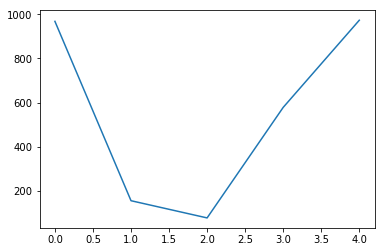

In [20]:
# Create graph
df['Births'].plot()

In [22]:
df['Names'][df['Births'] == df['Births'].max()].values

array(['Mel'], dtype=object)

The most popular name


,Names,Births
4,Mel,973


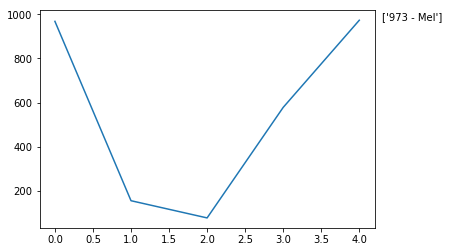

In [24]:
# Create graph
df['Births'].plot()

# Maximum value in the data set
MaxValue = df['Births'].max()

# Name associated with the maximum value
MaxName = df['Names'][df['Births'] == df['Births'].max()].values

# Text to display on graph
Text = str(MaxValue) + " - " + MaxName

# Add text to graph
plt.annotate(Text, xy=(1, MaxValue), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

print("The most popular name")
df[df['Births'] == df['Births'].max()]
#Sorted.head(1) can also be used

In [25]:
df['Names']

0        Bob
1    Jessica
2       Mary
3       John
4        Mel
Name: Names, dtype: object